In [1]:
from typing_extensions import TypedDict
from typing import Literal

In [3]:
class NewState(TypedDict):
    name: str 
    game: Literal["Cricket","Kabbadi","Football"]

In [10]:
def play_game(state: NewState):
    print("------Play Game Function has been called------")
    return {"name":state["name"]+"wants to play"}

def cricket(state:NewState):
    print("------cricket function has been called------")
    return {"name":state["name"],"game":"cricket"}

def kabbadi(state:NewState):
    print("------kabbadi function has been called------")
    return {"name":state["name"],"game":"kabbadi"}
def football(state:NewState):
    print("------football function has been called------")
    return {"name":state["name"],"game":"football"}

In [5]:
import random
from IPython.display import Image, display
from langgraph.graph import StateGraph,START,END

In [6]:
import random
def decide_paly(state:NewState)-> Literal["cricket","Kabbadi","Football"]:
    if random.random()<0.33:
        return "cricket"
    elif random.random()<0.66:
        return "Kabbadi"
    return "Football"
     


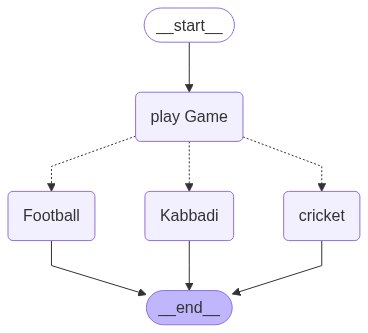

In [9]:
builder = StateGraph(NewState)
builder.add_node("play Game", play_game)
builder.add_node("cricket",cricket)
builder.add_node("Kabbadi",kabbadi)
builder.add_node("Football",football)


## flow
builder.add_edge(START,"play Game")
builder.add_conditional_edges("play Game",decide_paly)
builder.add_edge("cricket",END)


builder.add_edge("Kabbadi",END)
builder.add_edge("Football",END)



graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [17]:
graph.invoke({"name":"Sai "})

------Play Game Function has been called------
------cricket function has been called------


{'name': 'Sai wants to play', 'game': 'cricket'}